In [2]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import math
import scipy.linalg as la
from scipy import optimize as opt
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

Problem 1
========


$\displaystyle x_{uuu}(u) = - \frac{\left(F_{xxx}\{x(u),u)\}x_u^3(u) + 3F_{xxu}\{x(u),u\}x_u^2(u)+3F_{xx}\{x(u),u\}x_{uu}(u)x_u(u)+3F_{xuu}\{x(u),u\}x_u(u)+3F_{xu}\{x(u),u\}x_{uu}(u)+F_{uuu}\{x(u),u\}\right)}{ F_x\{x(u),u\}}$

Problem 2
===========

In [3]:
alpha = 0.33
k = 5.0
z = 1.0
b = 2.0
t =0.1
h = 24.0

def E1(inputs, params):
    w = inputs
    alpha, k, z, b, t, h = params 
    
    nd = k * (((1 - alpha) * z) / w) ** (1/alpha)
    pi = z * k ** alpha * nd **(1 - alpha) - w * nd
    ns = h - (b / (w * (1 + b))) * (w * h + pi - t)
    E = ns - nd
    return E

w_init = 0.5

init_vec = np.array([w_init])
params = [alpha, k, z, b, t, h]
results = opt.fsolve(E1, init_vec, args = params)
w5 = results[0]
print("W(5) = ", w5)

def derive1(inputs, params):

    eps = 1e-10
    w_init = 0.5
    init_vec = np.array([w_init])
    alpha, k, z, b, t, h = params
    
    paramsU = [alpha, k + eps, z, b, t, h]
    paramsL = [alpha, k - eps, z, b, t, h]
    
    resultsU = opt.fsolve(E1, init_vec, args = paramsU)[0]
    resultsL = opt.fsolve(E1, init_vec, args = paramsL)[0]
    dE1 = (resultsU - resultsL) / (2 * eps)
    
    return dE1

def derive2(inputs, params):

    eps = 1e-5
    w_init = 0.5
    init_vec = np.array([w_init])
    alpha, k, z, b, t, h = params
    
    paramsU = [alpha, k + eps, z, b, t, h]
    paramsL = [alpha, k - eps, z, b, t, h]
    
    resultsU = opt.fsolve(E1, init_vec, args = paramsU)[0]
    results = opt.fsolve(E1, init_vec, args = params)[0]
    resultsL = opt.fsolve(E1, init_vec, args = paramsL)[0]
    dE2 = (resultsU - (2 * results) + resultsL) / (eps ** 2)
    
    return dE2

dw5 = derive1(w5, params)
d2w5 = derive2(w5, params)

print("dW(5) = ",derive1(w5, params))
print("d2W(5) = ",derive2(w5, params))

def W_linear(w, dw, k, K):
    return w + dw * (k - K)

def W_quad(w, dw, d2w, k, K):
    return w + dw * (k - K) + 0.5 * d2w5 * (k - K)

W(5) =  0.627361779044
dW(5) =  0.0415861789449
d2W(5) =  -0.00557442980664


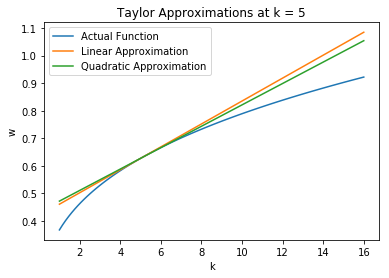

In [4]:
alpha = 0.33
kvec = np.linspace(1,16,100)
z = 1.0
b = 2.0
t =0.1
h = 24.0
k = 5
wvec = np.zeros((len(kvec)))

for i in range (0, len(kvec)):
    
    w_init = 0.5
    init_vec = np.array([w_init])
    params = [alpha, kvec[i], z, b, t, h]
    results = opt.fsolve(E1, init_vec, args = params)
    wvec[i] = results[0]

w5_linear = W_linear(w5, dw5, kvec, k)
w5_quad = W_quad(w5, dw5,d2w5,  kvec, k)

plt.plot(kvec, wvec, label = 'Actual Function')
plt.plot(kvec, w5_linear, label = 'Linear Approximation')
plt.plot(kvec, w5_quad, label = 'Quadratic Approximation')
plt.xlabel('k')
plt.ylabel('w')
plt.title('Taylor Approximations at k = 5')
plt.legend()
plt.show()

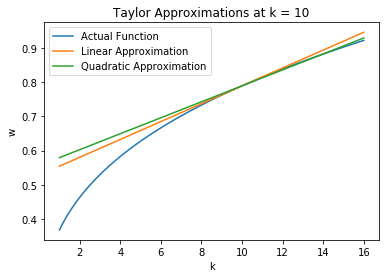

In [5]:
alpha = 0.33
kvec = np.linspace(1,16,100)
z = 1.0
b = 2.0
t =0.1
h = 24.0
k = 10
wvec = np.zeros((len(kvec)))

for i in range (0, len(kvec)):
    
    w_init = 0.5
    init_vec = np.array([w_init])
    params = [alpha, kvec[i], z, b, t, h]
    results = opt.fsolve(E1, init_vec, args = params)
    wvec[i] = results[0]

w_init = 0.5
init_vec = np.array([w_init])
params = [alpha, k, z, b, t, h]
results = opt.fsolve(E1, init_vec, args = params)
w10 = results[0]
dw10 = derive1(w10, params)
d2w10 = derive2(w10, params)    

w10_linear = W_linear(w10, dw10, kvec, k)
w10_quad = W_quad(w10, dw10 ,d2w10,  kvec, k)

plt.plot(kvec, wvec, label = 'Actual Function')
plt.plot(kvec, w10_linear, label = 'Linear Approximation')
plt.plot(kvec, w10_quad, label = 'Quadratic Approximation')
plt.xlabel('k')
plt.ylabel('w')
plt.title('Taylor Approximations at k = 10')
plt.legend()
plt.show()

Problem 3
==========

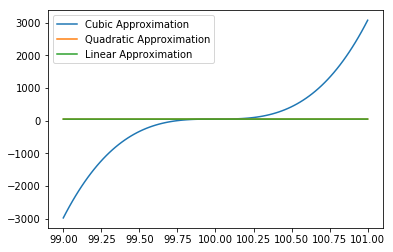

In [6]:
e = 1e-5

def F(x,y):
    return (x ** 0.35 + 0.9 * x - y) ** (-2.5) - 0.95 * (y ** 0.35 + 0.9 * y) ** (-2.5)

def Fx(x,y):
    return (F(x+e, y) - F(x-e, y)) / (2 * e)

def Fy(x,y):
    return (F(x, y+e) - F(x, y-e)) / (2 * e)

def Fxx(x, y):
    return (F(x+e,y)-2*F(x,y)+F(x-e,y))/(e**2)

def Fyy(x, y):
    return (F(x,y+e)-2*F(x,y)+F(x,y-e))/(e**2)

def Fxy(x, y):
    return (F(x+e,y+e)-F(x-e,y+e)-F(x+e,y-e)+F(x-e,y-e))/(4*e**2)

def Fxxx(x, y):
    return (F(x+2*e, y)-2*F(x+e,y)+2*F(x-e,y)-F(x-2*e,y))/(2*e**3)

def Fxxy(x, y):
    return (F(x+2*e,y+e) - 2*F(x, y+e) -F(x+2*e, y-e)+F(x-2*e,y+e)+2*F(x, y-e)-F(x-2*e, y-e))/(8*e)

def Fxyy(x,y):
    return (F(x-e, y + 2*e) - 2 * F(x-e, y) - F(x+e, y+2*e) + 2 * F(x-e, y - 2*e) - F(x+e, y-2*e)) / (8*e)

def Fyyy(x,y):
    return (F(x, y+2*e) - 2 * F(x, y+e) + 2 * F(x, y-e) - F(x, y-2*e)) / (2*e**3)

y0 = 49.2166
x0 = 100

def dydx(x0, y0):
    return - Fx(x0,y0) / Fy(x0,y0)

def d2ydx2(x0, y0):
    return - (Fyy(x0,y0) * (dydx(x0,y0))**2 + 2 * Fxy(x0,y0) * dydx(x0,y0) + Fxx(x0,y0))/ (Fy(x0,y0))

def d3ydx3(x0,y0):
    return - (Fyyy(x0,y0) * (dydx(x0,y0))**3 + 3 * Fxyy(x0,y0) * (dydx(x0,y0))**2 + 3 * Fxxy(x0,y0) * dydx(x0,y0) + \
              3 * Fyy(x0,y0) * dydx(x0,y0) * d2ydx2(x0,y0) + 3 * Fxy(x0,y0) * d2ydx2(x0,y0) + \
              Fxxx(x0,y0))/ (Fy(x0,y0))
              
def Gcubic(x, y0, x0):
    return y0 + dydx(x0,y0) * (x - x0) + 0.5 * d2ydx2(x0,y0) * (x - x0)**2 + (1./6) *  d3ydx3(x0,y0) * (x - x0)**3 

def Gquad(x, y0, x0):
    return y0 + dydx(x0,y0) * (x - x0) + 0.5 * d2ydx2(x0,y0) * (x - x0)**2 

def Glinear(x, y0, x0):
    return y0 + dydx(x0,y0) * (x - x0)

xvec = np.linspace(99,101,100)

yvec_cubic = Gcubic(xvec, y0, x0)
yvec_quad = Gquad(xvec, y0, x0)
yvec_linear = Glinear(xvec, y0, x0)

plt.plot(xvec, yvec_cubic, label = 'Cubic Approximation')
plt.plot(xvec, yvec_quad, label = 'Quadratic Approximation')
plt.plot(xvec, yvec_linear, label = 'Linear Approximation')
plt.legend()
plt.show()


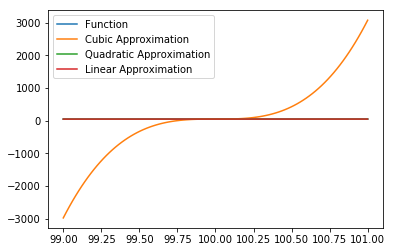

In [7]:
yvec = np.zeros((len(xvec)))

def F1(inputs, params):
    y = inputs[0]
    x = params[0]
    return (x ** 0.35 + 0.9 * x - y)  - 0.95 * (y ** 0.35 + 0.9 * y)


for i in range (0, len(xvec)):
    y_init = np.array([50])#Gcubic(xvec[i], y0, x0)])
    params = np.array([xvec[i]])
    results = opt.root(F1, y_init, args = params)
    yvec[i] = results.x[0]

plt.plot(xvec, yvec, label = 'Function')
plt.plot(xvec, yvec_cubic, label = 'Cubic Approximation')
plt.plot(xvec, yvec_quad, label = 'Quadratic Approximation')
plt.plot(xvec, yvec_linear, label = 'Linear Approximation')
plt.legend()
plt.show()

Problem 4
==============

In [47]:
#Find Hx analytically 

alpha = 0.35
beta = 0.98
kbar = (alpha * beta) ** (1 / (1 - alpha))
kvec = np.full((25), kbar)
weights = np.linspace(0.5, 1.5, 25)
kvec = weights * kbar
rho = 0.9

#Use Uhlig's notation to find values of F, G, H, L, M

F = (alpha * beta * kbar ** (alpha - 1)) / ((kbar ** alpha) - kbar)
G = - (beta * alpha * kbar **(alpha - 1) * (alpha + kbar ** (alpha-1))) / (kbar**alpha - kbar)
H = (beta * alpha ** 2 * kbar ** (2 * (alpha - 1))) / (kbar ** alpha - kbar)
L = - (alpha * beta * kbar**alpha) / (kbar ** alpha - kbar)
M = (alpha * beta * kbar ** (2 * alpha - 1)) / (kbar ** alpha - kbar)

P1 = (-G + math.sqrt(G **2 - 4 * F * H)) / (2 * F)
P2 = (-G - math.sqrt(G **2 - 4 * F * H)) / (2 * F)

if la.norm(P1) < 1:
    Hx = P1
else:
    Hx = P2

N = rho

QQ = - (L * N + M) / (F * N + F * Hx + G)

print("Hx = ", Hx)

Hx =  0.3499999999999999


In [9]:
#Find Hxx

def Fy(kbar):
    return (alpha * beta * kbar ** (alpha - 1)) / ((kbar ** alpha) - kbar)

def Fx(kbar):
    return - (beta * alpha * kbar **(alpha - 1) * (alpha + kbar ** (alpha-1))) / (kbar**alpha - kbar)

def Fuu(u):
    a = alpha
    numerator = (a - 1) * a ** 2 * beta * u ** (2*a-3)
    denominator = (u ** a - u)
    return numerator / denominator

def Fyy(u):
    a = alpha
    numerator = 2*a*beta*u**(a-1)
    denom = (u**alpha - u)**2
    return numerator / denom

def Fyx(u):
    a = alpha
    num = a*beta*(u**(a-2))*((-1-a)*u**(2*a)+u**(a+1)+a*u**2)
    denom = (u**a-u)**3
    return num / denom

def Fyu(u):
    a = alpha
    num = alpha**2*beta*u**(2*(a-1))
    denom = (u**a-u)**2
    return num / denom

def Fxx(u):
    a = alpha
    num = a*beta*u**(a-3)*((2*u**(3*a))+(a**2+3*a-4)*u**(2*a+1)+\
               (a**2-3*a+2)*u**(2+a) - a*(a+1)*u**(a+2) - (a-1)*a*u**3)
    denom = (u**a-u)**3
    return num/denom

def Fxu(u):
    a = alpha
    num = - a**2*beta*u**(2*a-3)*(u**a+(a-1)*u)
    denom = (u**a-u)**2
    return num / denom

def xu(u):
    return Hx

def xuu(u):
    numerator = (Fyy(u)*xu(u)**4 + 2*Fyx(u)*xu(u)**3 + 2*Fyu(u)*xu(u)**2 +\
                 Fxx(u)*xu(u)**2 + 2*Fxu(u)*xu(u) + Fuu(u))
    denominator = (Fy(u)*xu(u)**2 + Fy(u)*xu(u) + Fx(u))

    return - numerator / denominator

Hxx = xuu(kbar)

print(Fyy(kbar))
print(Fyx(kbar))
print(Fyu(kbar))
print(Fxx(kbar))
print(Fxu(kbar))
print(Fuu(kbar))
print("Hxx = ", Hxx)

14.667352944392718
-31.431111072747104
7.4833433389758754
105.30926981616871
-16.95315434854578
-9.317089716937744
Hxx =  -1.180085635564805


In [10]:
def rouwen(rho, mu, step, num):
    '''
    Adapted from Lu Zhang and Karen Kopecky. Python by Ben Tengelsen.
    Construct transition probability matrix for discretizing an AR(1)
    process. This procedure is from Rouwenhorst (1995), which works
    well for very persistent processes.

    INPUTS:
    rho  - persistence (close to one)
    mu   - mean and the middle point of the discrete state space
    step - step size of the even-spaced grid
    num  - number of grid points on the discretized process

    OUTPUT:
    dscSp  - discrete state space (num by 1 vector)
    transP - transition probability matrix over the grid
    '''

    # discrete state space
    dscSp = np.linspace(mu -(num-1)/2*step, mu +(num-1)/2*step, num).T

    # transition probability matrix
    q = p = (rho + 1)/2.
    transP = np.array([[p**2, p*(1-q), (1-q)**2], \
                    [2*p*(1-p), p*q+(1-p)*(1-q), 2*q*(1-q)], \
                    [(1-p)**2, (1-p)*q, q**2]]).T


    while transP.shape[0] <= num - 1:

        # see Rouwenhorst 1995
        len_P = transP.shape[0]
        transP = p * np.vstack((np.hstack((transP, np.zeros((len_P, 1)))), np.zeros((1, len_P+1)))) \
                + (1 - p) * np.vstack((np.hstack((np.zeros((len_P, 1)), transP)), np.zeros((1, len_P+1)))) \
                + (1 - q) * np.vstack((np.zeros((1, len_P+1)), np.hstack((transP, np.zeros((len_P, 1)))))) \
                + q * np.vstack((np.zeros((1, len_P+1)), np.hstack((np.zeros((len_P, 1)), transP))))

        transP[1:-1] /= 2.


    # ensure columns sum to 1
    if np.max(np.abs(np.sum(transP, axis=1) - np.ones(transP.shape))) >= 1e-12:
        print('Problem in rouwen routine!')
        return None
    else:
        return transP.T, dscSp

rho = 0.9
mu = 0.
num = 25
sigma = 0.02
step = 5 * sigma /12
    
pi, zvec = rouwen(rho, mu, step, num)

In [11]:
optK_linear = np.zeros((25))
optK_cfs = np.zeros((25))
optK_quad = np.zeros((25))

for i in range (0, len(kvec)):
    optK_quad[i] = kbar + Hx * (kvec[i] - kbar) + Hxx * (kvec[i] - kbar)**2
    optK_linear[i] = kbar + Hx * (kvec[i] - kbar) 
    optK_cfs[i] = alpha * beta * kvec[i] ** alpha

<IPython.core.display.Javascript object>


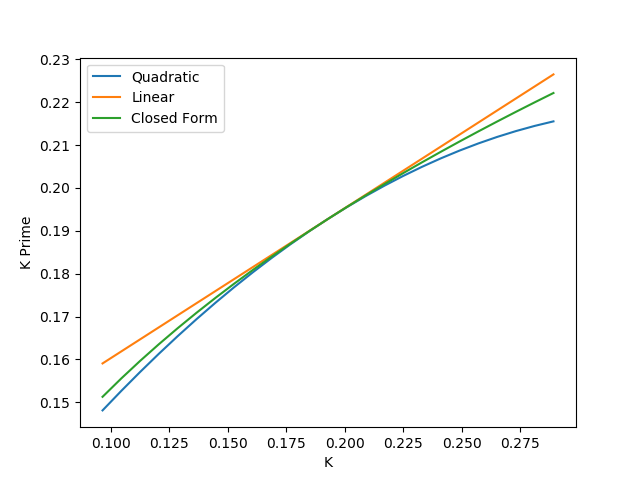

In [12]:
#Plot

import matplotlib

%matplotlib notebook

plt.plot(kvec, optK_quad, label = 'Quadratic')
plt.plot(kvec, optK_linear, label = 'Linear')
plt.plot(kvec, optK_cfs, label = 'Closed Form')
plt.xlabel('K')
plt.ylabel('K Prime')
plt.legend()

Problem 5
========

In [78]:
import sympy as sy
from sympy import diff
from sympy import lambdify

alpha = 0.35
beta = 0.98
Hz = QQ
Hv = 0
kbar = (alpha * beta) ** (1 / (1 - alpha))

params = np.array([Hx, Hz, Hv, N])

x2, x1, x0, z1, z0 = sy.symbols('x2 x1 x0 z1 z0')
nx = 1
nz = 1
ns = nx + nz + 1

F = (alpha * beta * kbar ** (alpha - 1)) / ((kbar ** alpha) - kbar)
GG = - (beta * alpha * kbar **(alpha - 1) * (alpha + kbar ** (alpha-1))) / (kbar**alpha - kbar)
H = (beta * alpha ** 2 * kbar ** (2 * (alpha - 1))) / (kbar ** alpha - kbar)
L = - (alpha * beta * kbar**alpha) / (kbar ** alpha - kbar)
M = (alpha * beta * kbar ** (2 * alpha - 1)) / (kbar ** alpha - kbar)

P1 = (-GG + math.sqrt(GG **2 - 4 * F * H)) / (2 * F)
P2 = (-GG - math.sqrt(GG **2 - 4 * F * H)) / (2 * F)

if la.norm(P1) < 1:
    Hx = P1
else:
    Hx = P2

N = rho

QQ = - (L * N + M) / (F * N + F * Hx + GG)

G = lambda x2, x1, x0, z1, z0: (alpha*beta*sy.exp(z1)*(x1**(alpha-1))*(sy.exp(z0)*x0**alpha-x1)/
                                (sy.exp(z1)*x1**alpha-x2))

Fx2x2 = diff(G(x2, x1, x0, z1, z0),x2,x2)
Fx2x1 = diff(G(x2, x1, x0, z1, z0),x2,x1)
Fx2x0 = diff(G(x2, x1, x0, z1, z0),x2,x0)
Fx2z1 = diff(G(x2, x1, x0, z1, z0),x2,z1)
Fx2z0 = diff(G(x2, x1, x0, z1, z0),x2,z0)

Fx1x1 = diff(G(x2, x1, x0, z1, z0),x1,x1)
Fx1x0 = diff(G(x2, x1, x0, z1, z0),x1,x0)
Fx1z1 = diff(G(x2, x1, x0, z1, z0),x1,z1)
Fx1z0 = diff(G(x2, x1, x0, z1, z0),x1,z0)

Fx0x0 = diff(G(x2, x1, x0, z1, z0),x0,x0)
Fx0z1 = diff(G(x2, x1, x0, z1, z0),x0,z1)
Fx0z0 = diff(G(x2, x1, x0, z1, z0),x0,z0) 

Fz1z1 = diff(G(x2, x1, x0, z1, z0),z1,z1)
Fz1z0 = diff(G(x2, x1, x0, z1, z0),z1,z1)

Fz0z0 = diff(G(x2, x1, x0, z1, z0),z0,z0)

Fx2x2 = lambdify((x2, x1, x0, z1, z0),Fx2x2,'numpy')
Fx2x1 = lambdify((x2, x1, x0, z1, z0),Fx2x1,'numpy')
Fx2x0 = lambdify((x2, x1, x0, z1, z0),Fx2x0,'numpy')
Fx2z1 = lambdify((x2, x1, x0, z1, z0),Fx2z1,'numpy')
Fx2z0 = lambdify((x2, x1, x0, z1, z0),Fx2z0,'numpy')

Fx1x1 = lambdify((x2, x1, x0, z1, z0),Fx1x1,'numpy')
Fx1x0 = lambdify((x2, x1, x0, z1, z0),Fx1x0,'numpy')
Fx1z1 = lambdify((x2, x1, x0, z1, z0),Fx1z0,'numpy')
Fx1z0 = lambdify((x2, x1, x0, z1, z0),Fx1z0,'numpy')

Fx0x0 = lambdify((x2, x1, x0, z1, z0),Fx0x0,'numpy')
Fx0z1 = lambdify((x2, x1, x0, z1, z0),Fx0z1,'numpy')
Fx0z0 = lambdify((x2, x1, x0, z1, z0),Fx0z0,'numpy')

Fz1z1 = lambdify((x2, x1, x0, z1, z0),Fz1z1,'numpy')
Fz1z0 = lambdify((x2, x1, x0, z1, z0),Fz1z0,'numpy')

Fz0z0 = lambdify((x2, x1, x0, z1, z0),Fz0z0,'numpy')

Fx2x2 = Fx2x2(kbar,kbar,kbar,0,0)
Fx2x1 = Fx2x1(kbar,kbar,kbar,0,0)
Fx2x0 = Fx2x0(kbar,kbar,kbar,0,0)
Fx2z1 = Fx2z1(kbar,kbar,kbar,0,0)
Fx2z0 = Fx2z0(kbar,kbar,kbar,0,0)

Fx1x1 = Fx1x1(kbar,kbar,kbar,0,0)
Fx1x0 = Fx1x0(kbar,kbar,kbar,0,0)
Fx1z1 = Fx1z1(kbar,kbar,kbar,0,0)
Fx1z0 = Fx1z0(kbar,kbar,kbar,0,0)

Fx0x0 = Fx0x0(kbar,kbar,kbar,0,0)
Fx0z1 = Fx0z1(kbar,kbar,kbar,0,0)
Fx0z0 = Fx0z0(kbar,kbar,kbar,0,0)

Fz1z1 = Fz1z1(kbar,kbar,kbar,0,0)
Fz1z0 = Fz1z0(kbar,kbar,kbar,0,0)

Fz0z0 = Fz0z0(kbar,kbar,kbar,0,0)

GAA = np.array([[Fx2x2, Fx2x1, Fx2x0, Fx2z1, Fx2z0],\
                [Fx2x1, Fx1x1, Fx1x0, Fx1z1, Fx1z0],\
               [Fx2x0, Fx1x0, Fx0x0, Fx0z1, Fx0z0], \
                [Fx2z1, Fx1z1, Fx0z1, Fz1z1, Fz1z0],\
               [Fx2z0, Fx1z0, Fx0z0, Fz1z0, Fz0z0]])

GA = np.array([F, GG, H, L, M]) 

def EFs(params):
    
    Hx, Hz, Hv, N = params 
    
    values = np.array([[Hx*Hx, Hx*Hz+Hz*N, Hx*Hv+Hv], [Hx, Hz, Hv], [1, 0, 0], [0, N, 0], [0, 1, 0]])
    
    return values

EL = np.kron(EFs(params),np.eye(nx)).T @ GAA @ EFs(params)


EL[2,2] = 0

def EFss(inputs, params):
    Hxx, Hxz, Hzz, Hvv = inputs
    Hx, Hz, N, Hv, EL, GA, ns = params
    values = np.array([[Hxx*Hx*Hx+Hx*Hxx, Hxx*Hx*Hz+Hx*Hxz+Hxz*Hx*N, Hxx*Hx*Hv],\
                      [Hxx, Hxz, 0.],\
                      [0.,0.,0.],\
                      [0.,0.,0.],\
                      [0.,0.,0.],\
                      [Hxx*Hx*Hz+Hx*Hxz+Hxz*Hx*N, Hxz*N*Hz+Hx*Hzz+Hzz*N*N, Hxz*N*Hv],\
                      [Hxz, Hzz, 0.],\
                      [0., 0., 0.],\
                      [0.,0.,0.],\
                      [0.,0.,0.],\
                      [Hxx*Hx*Hv, Hxz*N*Hv, Hx*Hvv+Hvv],\
                      [0.,0.,Hvv],\
                      [0.,0.,0.],\
                      [0.,0.,0.],\
                      [0.,0.,0.]])
    return values

In [72]:
from scipy import optimize as opt

def DSS(inputs, params):
    
    Hxx, Hxz, Hzz, Hvv = inputs
    Hx, Hz, N, Hv, EL, GA, ns = params
    DSS = EL + np.kron(np.eye(ns),GA) @ EFss(inputs,params)

    return DSS.flatten()

init_vec = np.array([1,1,1,1])
parameters = [Hx, Hz, N, Hv, EL, GA, ns]
results = opt.root(DSS, init_vec, args = parameters, method = 'lm')

Hxx, Hxz, Hzz, Hvv = results.x
print(results.x)


[ -1.18008564e+00  -3.38724165e-01  -2.21306643e-01  -8.03546796e-25]


In [73]:
#Set up values 

import time

def rouwen(rho, mu, step, num):
    '''
    Adapted from Lu Zhang and Karen Kopecky. Python by Ben Tengelsen.
    Construct transition probability matrix for discretizing an AR(1)
    process. This procedure is from Rouwenhorst (1995), which works
    well for very persistent processes.

    INPUTS:
    rho  - persistence (close to one)
    mu   - mean and the middle point of the discrete state space
    step - step size of the even-spaced grid
    num  - number of grid points on the discretized process

    OUTPUT:
    dscSp  - discrete state space (num by 1 vector)
    transP - transition probability matrix over the grid
    '''

    # discrete state space
    dscSp = np.linspace(mu -(num-1)/2*step, mu +(num-1)/2*step, num).T

    # transition probability matrix
    q = p = (rho + 1)/2.
    transP = np.array([[p**2, p*(1-q), (1-q)**2], \
                    [2*p*(1-p), p*q+(1-p)*(1-q), 2*q*(1-q)], \
                    [(1-p)**2, (1-p)*q, q**2]]).T


    while transP.shape[0] <= num - 1:

        # see Rouwenhorst 1995
        len_P = transP.shape[0]
        transP = p * np.vstack((np.hstack((transP, np.zeros((len_P, 1)))), np.zeros((1, len_P+1)))) \
                + (1 - p) * np.vstack((np.hstack((np.zeros((len_P, 1)), transP)), np.zeros((1, len_P+1)))) \
                + (1 - q) * np.vstack((np.zeros((1, len_P+1)), np.hstack((transP, np.zeros((len_P, 1)))))) \
                + q * np.vstack((np.zeros((1, len_P+1)), np.hstack((np.zeros((len_P, 1)), transP))))

        transP[1:-1] /= 2.


    # ensure columns sum to 1
    if np.max(np.abs(np.sum(transP, axis=1) - np.ones(transP.shape))) >= 1e-12:
        print('Problem in rouwen routine!')
        return None
    else:
        return transP.T, dscSp

rho = 0.9
mu = 0.
num = 25
sigma = 0.02
step = 5 * sigma /12
    
pi, zvec = rouwen(rho, mu, step, num)

alpha = 0.35
beta = 0.98
kbar = (alpha * beta) ** (1 / (1 - alpha))
kvec = np.full((25), kbar)
weights = np.linspace(0.5, 1.5, 25)
kvec = weights * kbar

print(kbar)

0.1927826194504225


In [74]:
matrix = np.array([[Hxx, Hxz, 0], [Hxz, Hzz, 0], [0,0, Hvv]])

In [76]:
#Calculating policy function 

optK_linear = np.zeros((25,25))
optK_cfs = np.zeros((25,25))
optK_quad = np.zeros((25,25))

for i in range (0, len(kvec)):
    for j in range (0, len(zvec)):
        optK_linear[j,i] = kbar + Hx * (kvec[i] - kbar) + Hz * zvec[j]
        optK_cfs[j,i] = alpha * beta * np.exp(zvec[j]) * kvec[i] ** alpha
        optK_quad[j,i] = kbar + Hx * (kvec[i] - kbar) + Hz * zvec[j] + \
            0.5 * np.kron(np.eye(1), np.array([kvec[i] - kbar, zvec[i], rho])) @ matrix @ np.array([kvec[i] - kbar, zvec[i], rho])
         

<IPython.core.display.Javascript object>


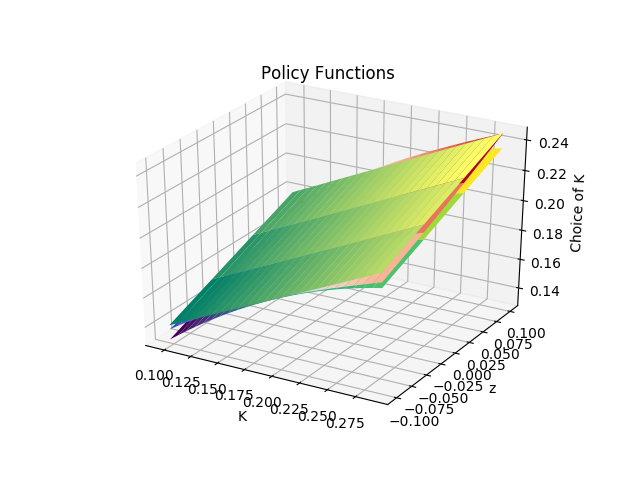

In [77]:
#Plot

import matplotlib

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')

kvec_mesh, zvec_mesh = np.meshgrid(kvec, zvec)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(kvec_mesh, zvec_mesh, optK_linear, rstride=8,
                cstride=1, cmap=cmap1, label =  'Linearization')
ax.plot_surface(kvec_mesh, zvec_mesh, optK_cfs, rstride=8,
                cstride=1, cmap=cm.coolwarm, label = 'Closed Form Solution')
ax.plot_surface(kvec_mesh, zvec_mesh, optK_quad, rstride=8,
                cstride=1, cmap='viridis', label = 'Value Function Iteration')
ax.set_title('Policy Functions')
ax.set_xlabel(r'K')
ax.set_ylabel(r'z')
ax.set_zlabel(r'Choice of K')